Implement the Q-Learning algorithm to solve a simple grid world problem. The grid world is represented as a 5x5 matrix with 'S' as the start state, 'G' as the goal state, and 'X' as an obstacle. The agent can take actions 'up', 'down', 'left', and 'right'. Use Python Code in Jupyter Notebook.



#Grid World:

# S - - - -

# - X - - -

# - - - X -

# - X - - -

# - - - - G



Your task is to find a path from 'S' to 'G' using Q-Learning. Initialize Q-values to zero for all state-action pairs. Use an epsilon-greedy policy with epsilon = 0.2.

Provide the Q-values for each state-action pair after 1000 episodes.

In [19]:
# MAZE PROBLEM 
# MAKE A MAZE PROBLEM (4x4)
#  # 1 2 3 4 5
#  # # # # # # #
#1 # S         #
#2 #   W       #
#3 #       W   #
#4 #   W       #
#5 #         G #
#  #############
# S - start
# G - end 
# W - wall
# nothing - path
# there is randomized walls,start, and end  with different paths
# GOAL = MAXIMIZE THE EXPECTED REWARD
# Number of states -  25 for each block
# Number of possible actions - 25
num_states = 25
num_actions = 25
matrix_loc = [
  ["R1C1","R1C2","R1C3","R1C4","R1C5"],
  ["R2C1","R2C2","R2C3","R2C4","R2C5"],
  ["R3C1","R3C2","R3C3","R3C4","R3C5"],
  ["R4C1","R4C2","R4C3","R4C4","R4C5"],
  ["R5C1","R5C2","R5C3","R5C4","R5C5"]
]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize  Reinforcement learning parameters
gamma = 0.7 # Discount factor 
alpha = 0.8 # Learning rate 
epsilon = 0.2 # epsilon for greedy algorithm
num_episodes = 10000 # Number of Episodes

# -----------Q-Learning algorithm-----------
# Initializing Q-Values and start value
# Initializing Q-Values
Q = np.zeros([num_states, num_actions])
cuml_sum = []  # array of cumulative sum per episode
# initializing the start and goal in matrix


# initializing the start,goal, and blocks in matrix
start_location = matrix_loc[0][0] # R1C1
end_location = matrix_loc[4][4]  # R5C5
block_1 = matrix_loc[1][1]
block_2 = matrix_loc[2][3]
block_3 = matrix_loc[3][1]

# Maps indices to locations
location_to_state = {
    'R1C1' : 0,
    'R1C2' : 1,
    'R1C3' : 2,
    'R1C4' : 3,
    'R1C5' : 4, 
    'R2C1' : 5,
    'R2C2' : 6,
    'R2C3' : 7,
    'R2C4' : 8,
    'R2C5' : 9,
    'R3C1' : 10,
    'R3C2' : 11,
    'R3C3' : 12,
    'R3C4' : 13,
    'R3C5' : 14,
    'R4C1' : 15,
    'R4C2' : 16,
    'R4C3' : 17,
    'R4C4' : 18,
    'R4C5' : 19,
    'R5C1' : 20,
    'R5C2' : 21,
    'R5C3' : 22,
    'R5C4' : 23,
    'R5C5' : 24
}
state_to_location = dict((state,location) for location,state in location_to_state.items()) # for getting route path



# REWARD MAP FOR THE MATRIX MAZE
# 1 = current and possible paths
# 0 = not availiable paths
# -1 = for all path if agent is in the block tile and all directions going in the block tile to prevent the agent to go to the block tile as much as possible
# 100 = goal (changed 1 to 100 for more accurate agent)
reward_matrix = np.array([
    [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R1C1
    [1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R1C2
    [0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R1C3
    [0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R1C4
    [0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R1C5
    [1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R2C1
    [0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R2C2
    [0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,0., 1., 0., 0., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R2C3
    [0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R2C4
    [0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R2C5
    [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
    0., 0., 0., 0., 0., 0., 0., 0., 0.], # done R3C1
    [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
    1., 0., 0., 0., 0., 0., 0., 0., 0.], # done R3C2
    [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
    0., 1., 0., 0., 0., 0., 0., 0., 0.], # done R3C3
    [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,1., 1., 0.,
    0., 0., 1., 0., 0., 0., 0., 0., 0.], # done R3C4
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
    0., 0., 0., 1., 0., 0., 0., 0., 0.], # done R3C5
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
    1., 0., 0., 0., 1., 0., 0., 0., 0.], # done R4C1
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
    1., 1., 0., 0., 0., 1., 0., 0., 0.], # done R4C2
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
    1., 1., 1., 0., 0., 0., 1., 0., 0.], # done R4C3
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
    0., 1., 1., 1., 0., 0., 0., 1., 0.], # done R4C4
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
    0., 0., 1., 1., 0., 0., 0., 0., 1.], # done R4C5
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
    0., 0., 0., 0., 1., 1., 0., 0., 0.], # done R5C1
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    1., 0., 0., 0., 1., 1., 1., 0., 0.], # done R5C2
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    0., 1., 0., 0., 0., 1., 1., 1., 0.], # done R5C3
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    0., 0., 1., 0., 0., 0., 1., 1., 1.], # done R5C4
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    0., 0., 0., 1., 0., 0., 0., 1., 1.]  # done R5C5
])

# Copy the rewards matrix to new Matrix
rewards_new = np.copy(reward_matrix)
# Get the states
ending_state = location_to_state[end_location]
block_1_state = location_to_state[block_1]
block_2_state = location_to_state[block_2]
block_3_state = location_to_state[block_3]
# With the above information automatically set the states to the given assigned values
rewards_new[ending_state,ending_state] = 100

# makes all the next action values in the block location -1 and the block location 1

# block 1 
block_1_index = 0 
while block_1_index < num_actions:
    if (block_1_index == block_1_state):
        rewards_new[block_1_state,block_1_state] = 1
    else:
        rewards_new[block_1_state,block_1_index] = 0
    block_1_index+=1

# block 2
block_2_index = 0
while block_2_index < num_actions:
        if (block_2_index == block_2_state):
            rewards_new[block_2_state,block_2_state] = 1
        else:
            rewards_new[block_2_state,block_2_index] = 0
        block_2_index+=1

# block 3 
block_3_index = 0
while block_3_index < num_actions:
        if (block_3_index == block_3_state):
            rewards_new[block_3_state,block_3_state] = 1
        else:
            rewards_new[block_3_state,block_3_index] = 0
        block_3_index+=1







# list of location pertaining to the start,end,location of block 1, location of block 2 respectively

rewards_new


array([[  1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  

In [21]:
# Q-Learning process
for i in range(num_episodes):

    # Pick up a state randomly

    current_state = np.random.randint(0,num_states) # Python excludes the upper bound

    # For traversing through the neighbor locations in the maze
    playable_actions = []

    # Iterate through the new rewards matrix and get the actions > 0
    for j in range(num_actions):
        if rewards_new[current_state,j] > 0:
            playable_actions.append(j)

    # Pick an action randomly from the list of playable actions leading us to the next state
    # epsilon greedy policy 
    if np.random.uniform(0,1) < epsilon:
        next_state = np.random.choice(playable_actions)
    else:
        next_state = np.argmax(Q[current_state,])
        
  

    # Compute the temporal difference
    # The action here exactly refers to going to the next state
    TD = rewards_new[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state,next_state]

    # Update the Q-Value using the Bellman equation
    Q[current_state,next_state] += alpha * TD

    # calculating sum per episode
    iandjsum = 0 # temporary variable to calculate cumulative sum per episode
    for i in range(num_states):
        j = np.argmax(Q[i,])
        iandjsum += Q[i,j]
    cuml_sum.append(iandjsum)



Text(183.22222222222223, 0.5, 'Current State')

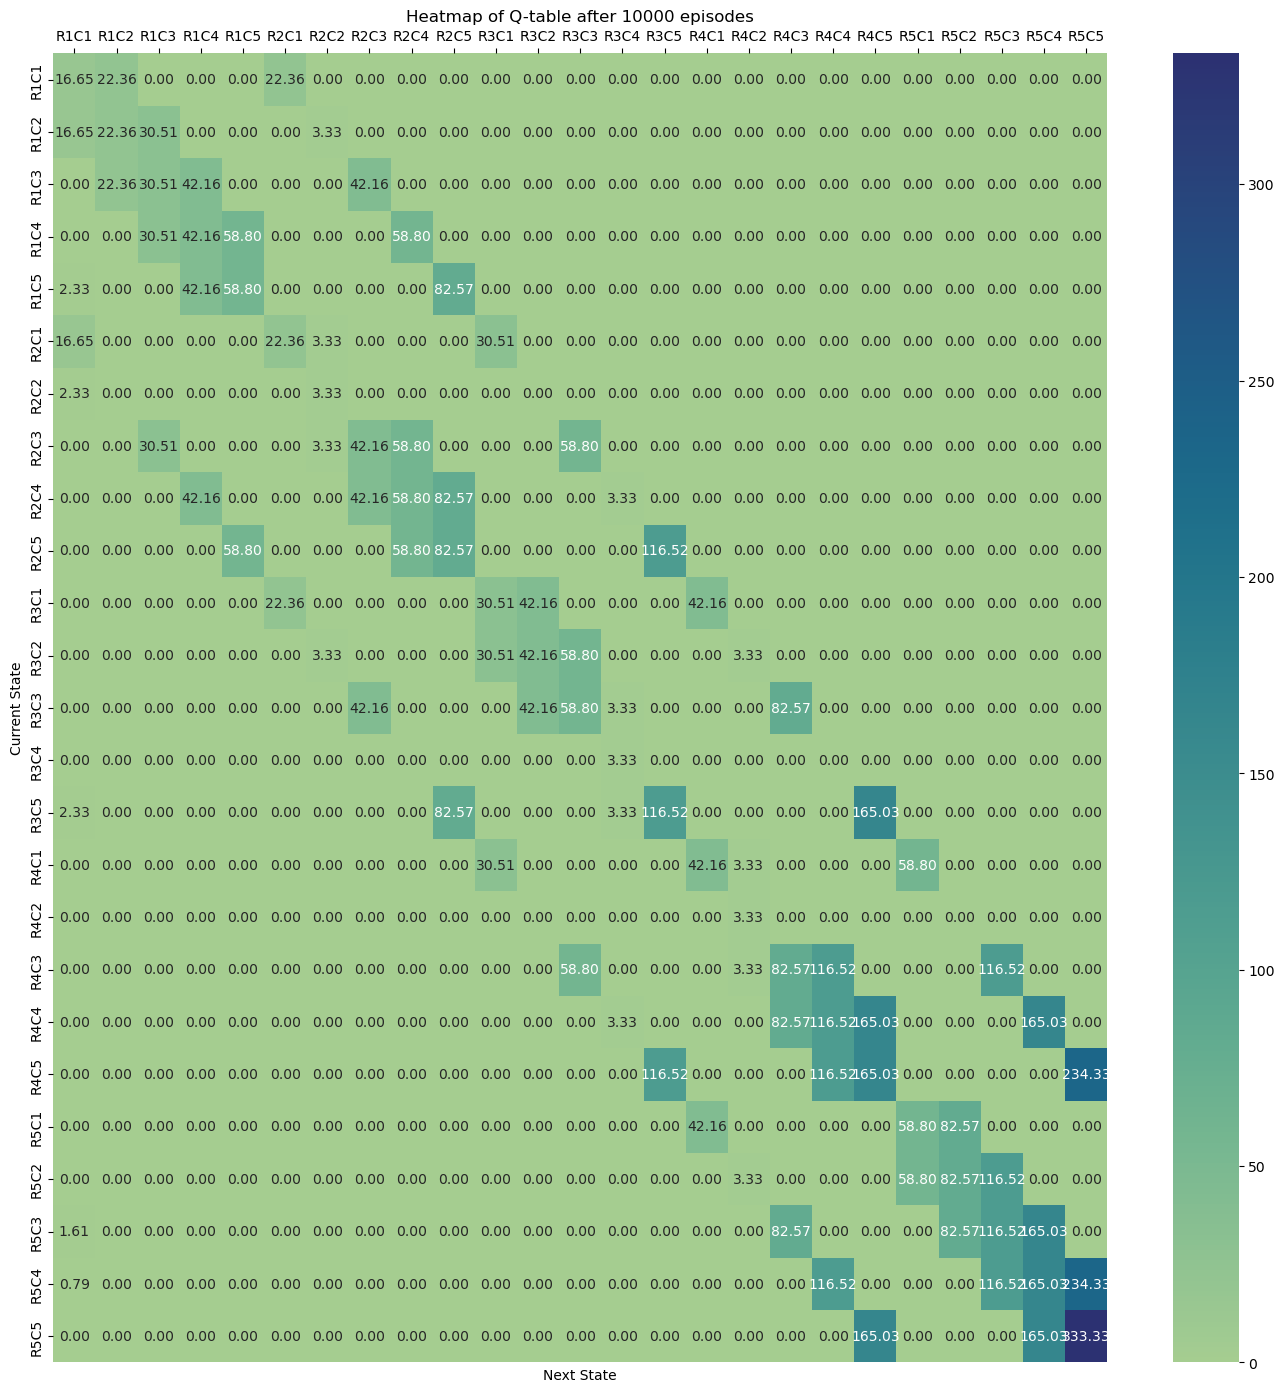

In [22]:
import seaborn as sns

# CREATE HEATMAP
ax = plt.figure(figsize=(17,17))
ax = sns.heatmap(Q,annot= True,fmt= ".2f",xticklabels=list(location_to_state.keys()),yticklabels=list(location_to_state.keys()),cmap="crest")

# LABEL HEATMAP
ax.xaxis.tick_top()
plt.title("Heatmap of Q-table after {0:d} episodes".format(num_episodes))
plt.xlabel("Next State")
plt.ylabel("Current State")

In [23]:
if num_episodes >= 10000:
    # Initialize the optimal route with the starting location
    stored_start_location = start_location
    route = [start_location]
    # We do not know about the next location yet, so initialize with the value of starting location
    next_location = start_location
    # We don't know about the exact number of iterations needed to reach to the final location hence while loop will be a good choice for iteratiing
    while(next_location != end_location):
        # Fetch the starting state
        starting_state = location_to_state[start_location]
        # Fetch the highest Q-value pertaining to starting state
        next_state = np.argmax(Q[starting_state,])
        # We got the index of the next state. But we need the corresponding letter. 
        next_location = state_to_location[next_state]
        route.append(next_location)
        # Update the starting location for the next iteration
        start_location = next_location
        
    print("start:",stored_start_location," end: ",end_location, "blocks: ",[block_1,block_2])
    print("ROUTE:",route)
    print("Matrix Locations:",end="")
matrix_loc

start: R1C1  end:  R5C5 blocks:  ['R2C2', 'R3C4']
ROUTE: ['R1C1', 'R1C2', 'R1C3', 'R1C4', 'R1C5', 'R2C5', 'R3C5', 'R4C5', 'R5C5']
Matrix Locations:

[['R1C1', 'R1C2', 'R1C3', 'R1C4', 'R1C5'],
 ['R2C1', 'R2C2', 'R2C3', 'R2C4', 'R2C5'],
 ['R3C1', 'R3C2', 'R3C3', 'R3C4', 'R3C5'],
 ['R4C1', 'R4C2', 'R4C3', 'R4C4', 'R4C5'],
 ['R5C1', 'R5C2', 'R5C3', 'R5C4', 'R5C5']]

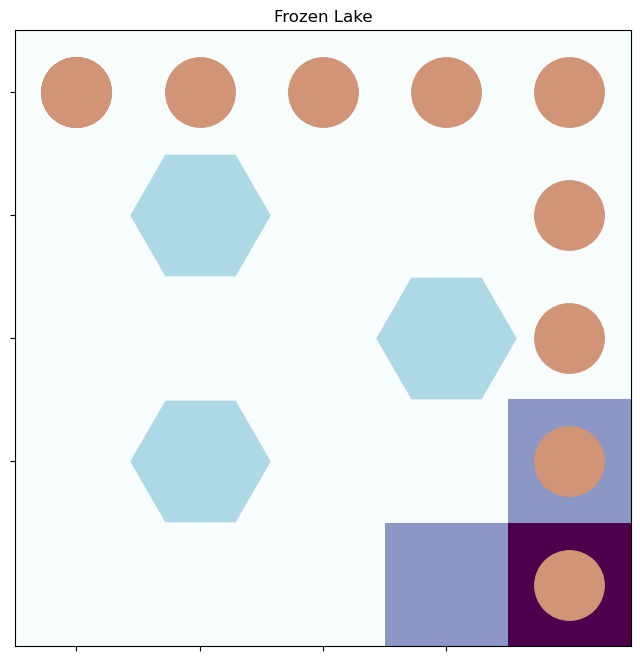

In [24]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
if num_episodes >= 10000:



    location_to_graph = {
        'R1C1' : [0,0],
        'R1C2' : [1,0],
        'R1C3' : [2,0],
        'R1C4' : [3,0],
        'R1C5' : [4,0],
        'R2C1' : [0,1],
        'R2C2' : [1,1],
        'R2C3' : [2,1],
        'R2C4' : [3,1],
        'R2C5' : [4,1],
        'R3C1' : [0,2],
        'R3C2' : [1,2],
        'R3C3' : [2,2],
        'R3C4' : [3,2],
        'R3C5' : [4,2],
        'R4C1' : [0,3],
        'R4C2' : [1,3],
        'R4C3' : [2,3],
        'R4C4' : [3,3],
        'R4C5' : [4,3],
        'R5C1' : [0,4],
        'R5C2' : [1,4],
        'R5C3' : [2,4],
        'R5C4' : [3,4],
        'R5C5' : [4,4],

    }



    path = []
    path_animation = [] # added this state for animation 
    blocks = [location_to_graph[block_1],location_to_graph[block_2],location_to_graph[block_3]]
    for i in route:
        path_animation.append(location_to_state[i])
        path.append([location_to_graph[i],i])



    # SET UP INITIAL ENVIRONMENT
    fig, ax = plt.subplots(figsize = (8,8))
    data = np.zeros((4,4))
    heatmap = ax.imshow(data, cmap='YlOrRd', origin='upper')
    heatmap = plt.title("Frozen Lake")
    heatmap = plt.xticks(np.arange(0,4,1))
    heatmap = plt.yticks(np.arange(0,4,1))
    heatmap =ax.set_xticklabels([])
    heatmap = ax.set_yticklabels([])
    heatmap = plt.plot(blocks[0][0],blocks[0][1],marker = 'H', color = "lightblue",markersize= 100)
    heatmap = plt.plot(blocks[1][0],blocks[1][1],marker = 'H', color = "lightblue",markersize= 100)
    heatmap = plt.plot(blocks[2][0],blocks[2][1],marker = 'H', color = "lightblue",markersize= 100)
    heatmap = plt.plot(path[-1][0][0],path[-1][0][1],marker = '*', color = "yellow",markersize= 50)
    heatmap = plt.plot([],[],marker = 'o', color = "grey",markersize= 50)


    # GET AGENT STEPS AND TURN IT INTO FRAMES
    frames = len(path_animation)

    # UPDATE PER FRAME
    def update(frame):

        # TURN IT FROM LOOP BASED TO FUNCTION BASED CODE BLOCK
        j = state_to_location[path_animation[frame]]
        Q_val_heat_map_loc = []
        j_index = location_to_state[j]
        for k in range(num_states):
            Q_val_heat_map_loc.append(Q[j_index,k])
        Q_val_heat_map_loc = np.array(Q_val_heat_map_loc).reshape((5,5))
        
        
        # PLOT UPDATED ENVIRONMENT
        heatmap = ax.imshow(Q_val_heat_map_loc,cmap="BuPu")
        heatmap = plt.xticks(np.arange(0,4,1))
        heatmap = plt.yticks(np.arange(0,4,1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # PLOT AGENT DECISION AND CHOSEN DESTINATION
        heatmap = plt.plot(location_to_graph[j][0],location_to_graph[j][1],marker = 'o', color = "#D19477",markersize= 50)
        if (frame < frames - 1):
            heatmap = plt.plot(path[frame+1][0][0],path[frame+1][0][1],marker = "X",color = "red", markersize = 20)
        return heatmap
        
    # ANIMATING THE AGENT ACTIONS AND ENVIRONEMNT
    ani = FuncAnimation(fig, update, frames= frames, blit=True)

HTML(ani.to_jshtml())






